In [1]:
def file_num(name):
    return int(name.split('_')[1].split('.')[0])

In [2]:
import os
import glob
import csv
import numpy as np

hist = [[] for i in range(81)]
doses = [0 for i in range(21)]
for i in range(1, 33):
    dir_name = 'uniform_150k/{}/protocols'.format(i)
    files = [name for name in os.listdir(dir_name) if os.path.isfile(os.path.join(dir_name, name))]
    print('dir', i, ':', len(files), 'files')
    for fname in files:
        rows = []
        full_fname = os.path.join(dir_name, fname)
        fnum = file_num(fname)
        with open(full_fname, newline='') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            for row in reader:
                rows.append(list(map(float, row)))
            try:
                with open('uniform_150k/{}/aliveCount/{}_{}.csv'.format(i, i, fnum), newline='') as countfile:
                    c = int(countfile.read())
                    hist[int(sum(rows[1])/0.125)].append(c)
                    doses[len(rows[1])] += 1
            except:
                pass
            

dir 1 : 3752 files
dir 2 : 4208 files
dir 3 : 4424 files
dir 4 : 4592 files
dir 5 : 4804 files
dir 6 : 5218 files
dir 7 : 5168 files
dir 8 : 5164 files
dir 9 : 5602 files
dir 10 : 5368 files
dir 11 : 5788 files
dir 12 : 5436 files
dir 13 : 5814 files
dir 14 : 6132 files
dir 15 : 6058 files
dir 16 : 6524 files
dir 17 : 6360 files
dir 18 : 6354 files
dir 19 : 6332 files
dir 20 : 6500 files
dir 21 : 6980 files
dir 22 : 6634 files
dir 23 : 6978 files
dir 24 : 7100 files
dir 25 : 7282 files
dir 26 : 7614 files
dir 27 : 7902 files
dir 28 : 7596 files
dir 29 : 7810 files
dir 30 : 7938 files
dir 31 : 7790 files
dir 32 : 6608 files


In [3]:
suma = 0
for s in range(1, 81):
    print('sum: {} | count: {}'.format(s/8, len(hist[s])))
    suma = suma + len(hist[s])
print('Number of protocols: {}'.format(suma))

sum: 0.125 | count: 0
sum: 0.25 | count: 0
sum: 0.375 | count: 0
sum: 0.5 | count: 0
sum: 0.625 | count: 0
sum: 0.75 | count: 2
sum: 0.875 | count: 2
sum: 1.0 | count: 4
sum: 1.125 | count: 6
sum: 1.25 | count: 8
sum: 1.375 | count: 10
sum: 1.5 | count: 14
sum: 1.625 | count: 20
sum: 1.75 | count: 28
sum: 1.875 | count: 38
sum: 2.0 | count: 52
sum: 2.125 | count: 72
sum: 2.25 | count: 100
sum: 2.375 | count: 138
sum: 2.5 | count: 190
sum: 2.625 | count: 262
sum: 2.75 | count: 358
sum: 2.875 | count: 488
sum: 3.0 | count: 640
sum: 3.125 | count: 838
sum: 3.25 | count: 1052
sum: 3.375 | count: 1340
sum: 3.5 | count: 1566
sum: 3.625 | count: 1784
sum: 3.75 | count: 1966
sum: 3.875 | count: 2364
sum: 4.0 | count: 2542
sum: 4.125 | count: 2708
sum: 4.25 | count: 3038
sum: 4.375 | count: 3056
sum: 4.5 | count: 3188
sum: 4.625 | count: 3418
sum: 4.75 | count: 3414
sum: 4.875 | count: 3582
sum: 5.0 | count: 3592
sum: 5.125 | count: 3664
sum: 5.25 | count: 3798
sum: 5.375 | count: 3770
sum: 5.5

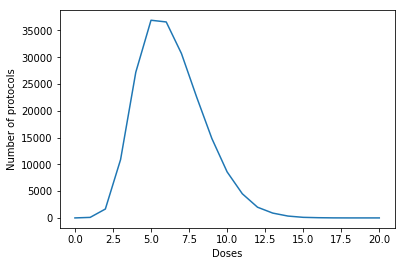

In [7]:
import matplotlib
import matplotlib.pyplot as plt
plt.plot([i for i in range(21)], doses)
plt.ylabel('Number of protocols')
plt.xlabel('Doses')
plt.show()

[Text(0, 0.5, 'std dev'), Text(0.5, 0, 'dose')]

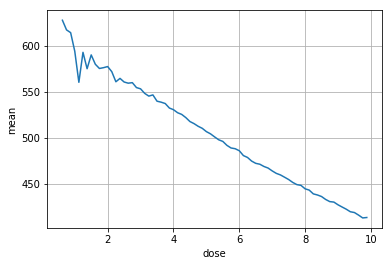

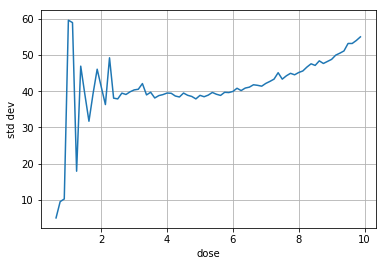

In [5]:
s = np.arange(0.625, 10.0, 0.125)
av = list(map(np.mean, hist[6:]))
fig, ax_mean = plt.subplots()
ax_mean.plot(s, av)

ax_mean.set(xlabel='dose', ylabel='mean')
ax_mean.grid()

stddev = list(map(np.std, hist[6:]))
fig_s, ax_std = plt.subplots()
ax_std.grid()
ax_std.plot(s, stddev)
ax_std.set(xlabel='dose', ylabel='std dev')


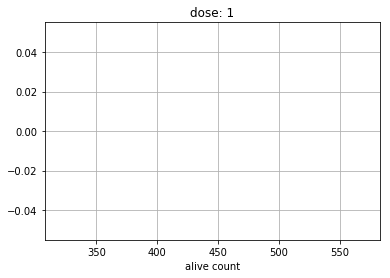

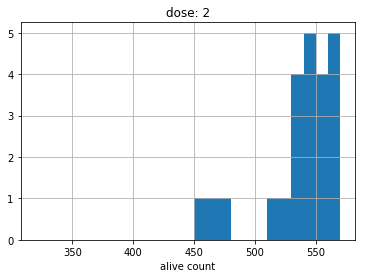

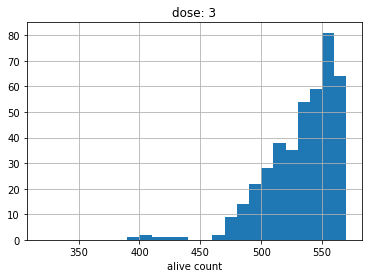

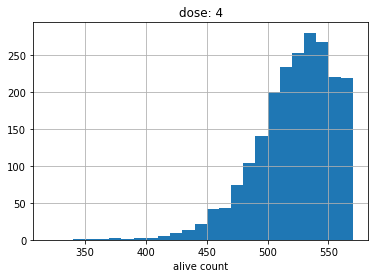

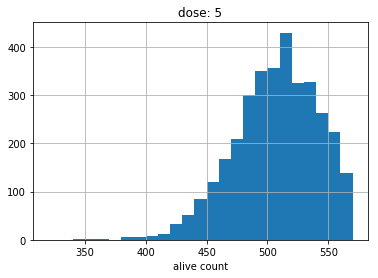

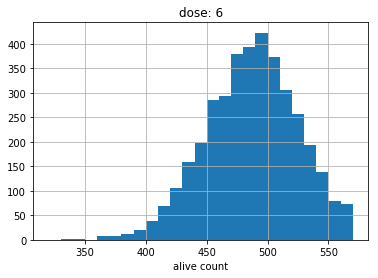

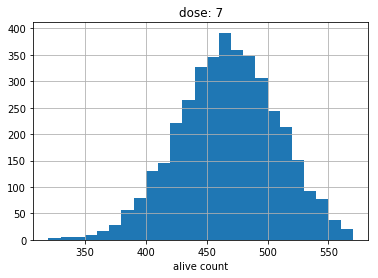

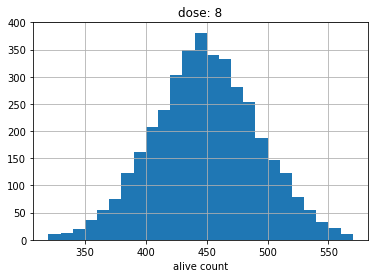

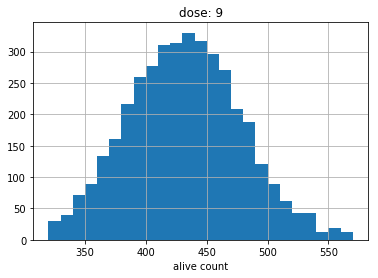

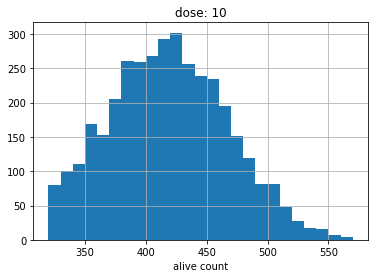

In [6]:
bins = np.arange(320, 580, 10)
for s in range(1, 11):
    fig2, h = plt.subplots()
    h.hist(hist[s * 8], bins=bins)
    h.set_title('dose: {}'.format(s))
    h.grid()
    h.set(xlabel='alive count')